# 🎓 International Students Demographics Cleanup (Reconstructed)

This notebook **reconstructs** the data cleaning workflow for the *International Students Demographics* project.
Because the original CSVs are not included, we **simulate small sample datasets** that mimic the structure of the six sources:
`academic.csv`, `academic_detail.csv`, `field_of_study.csv`, `origin.csv`, `source_of_fund.csv`, and `status.csv`.

You can run this notebook end-to-end to see how the pipeline works:
1) generate data → 2) load → 3) validate → 4) clean → 5) export to Excel → 6) quick plots.

## 1. Setup & Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path('data')
DATA_DIR.mkdir(exist_ok=True)


## 2. Generate Simulated Datasets (if originals are missing)
The shapes and columns are inspired by the original sources, with small random values for demonstration.

In [13]:
# Academic overview
df1 = pd.DataFrame({
    'year': ['2018/19','2019/20','2020/21','2021/22','2022/23'],
    'students': [1095299, 1075496, 914095, 948519, 1057188],
    'us_students': [19828000, 19720000, 19744000, 20327000, 18961280],
    'undergraduate': [431930, 419321, 359787, 344532, 347602],
    'graduate': [377943, 374435, 329272, 385097, 467027],
    'non_degree': [62341, 58201, 21151, 34131, 43766],
    'opt': [223085, 223539, 203885, 184759, 198793]
})

# Academic detail
df2 = pd.DataFrame({
    'year': ['2019/20','2019/20','2022/23','2022/23'],
    'academic_type': ['Undergraduate','Graduate','Non-Degree','OPT'],
    'academic_level': ["Bachelor's","Master's","Intensive English","OPT"],
    'students': [177381, 110857, 10801, 198793]
})

# Field of study
df3 = pd.DataFrame({
    'year': ['2019/20','2019/20','2022/23','2022/23'],
    'field_of_study': ['Business and Management','Engineering','Computer and Information Sciences','Social Sciences'],
    'major': ['Business and Management','Engineering','Computer and Information Sciences','Social Sciences'],
    'students': [101360.0, 146000.0, np.nan, 53998.0]  # include a NaN to demonstrate fillna
})

# Origin (region, country, academic type)
df4 = pd.DataFrame({
    'year': ['2022/23']*5,
    'origin_region': ['East Asia','South Asia','Middle East','Europe','Latin America'],
    'origin': ['China','India','Saudi Arabia','Germany','Brazil'],
    'academic_type': ['Undergraduate','Graduate','Graduate','Undergraduate','Non-Degree'],
    'students': [150000, 200000, 38000, 25000, 12000]
})

# Source of funds
df5 = pd.DataFrame({
    'year': ['2022/23']*5,
    'academic_type': ['Undergraduate','Undergraduate','Graduate','Graduate','OPT'],
    'source_type': ['International','U.S.','International','U.S.','U.S.'],
    'source_of_fund': ['Personal/Family','U.S. Govt','Foreign Govt/Univ','U.S. Univ','Current Employment'],
    'students': [201578, 749, 9742, 12450, 198793]
})

# Status (gender, marital, visa, study load)
df6 = pd.DataFrame({
    'year': [str(y) for y in range(2008, 2013)],
    'female': np.random.randint(250000, 400000, 5),
    'male': np.random.randint(300000, 500000, 5),
    'single': np.random.randint(500000, 800000, 5),
    'married': np.random.randint(60000, 100000, 5),
    'full_time': np.random.randint(700000, 1000000, 5),
    'part_time': np.random.randint(40000, 80000, 5),
    'visa_f': np.random.randint(600000, 900000, 5),
    'visa_j': np.random.randint(300, 800, 5),
    'visa_other': np.random.randint(20, 80, 5)
})

# Save to CSV so the rest of the notebook behaves like the original workflow
df1.to_csv(DATA_DIR / 'academic.csv', index=False)
df2.to_csv(DATA_DIR / 'academic_detail.csv', index=False)
df3.to_csv(DATA_DIR / 'field_of_study.csv', index=False)
df4.to_csv(DATA_DIR / 'origin.csv', index=False)
df5.to_csv(DATA_DIR / 'source_of_fund.csv', index=False)
df6.to_csv(DATA_DIR / 'status.csv', index=False)

print('Simulated CSVs written to', DATA_DIR.resolve())

Simulated CSVs written to /Users/macadmin/Downloads/data


## 3. Load Datasets

In [14]:
df1 = pd.read_csv(DATA_DIR / 'academic.csv')
df2 = pd.read_csv(DATA_DIR / 'academic_detail.csv')
df3 = pd.read_csv(DATA_DIR / 'field_of_study.csv')
df4 = pd.read_csv(DATA_DIR / 'origin.csv')
df5 = pd.read_csv(DATA_DIR / 'source_of_fund.csv')
df6 = pd.read_csv(DATA_DIR / 'status.csv')
df1.head()

,year,students,us_students,undergraduate,graduate,non_degree,opt
0,2018/19,1095299,19828000,431930,377943,62341,223085
1,2019/20,1075496,19720000,419321,374435,58201,223539
2,2020/21,914095,19744000,359787,329272,21151,203885
3,2021/22,948519,20327000,344532,385097,34131,184759
4,2022/23,1057188,18961280,347602,467027,43766,198793


## 4. Data Quality Checks

In [15]:
# Null checks
null_summary = {
    'df1_academic': df1.isnull().any().to_dict(),
    'df2_academic_detail': df2.isnull().any().to_dict(),
    'df3_field_of_study': df3.isnull().any().to_dict(),
    'df4_origin': df4.isnull().any().to_dict(),
    'df5_source_of_fund': df5.isnull().any().to_dict(),
    'df6_status': df6.isnull().any().to_dict(),
}
null_summary

{'df1_academic': {'year': False,
  'students': False,
  'us_students': False,
  'undergraduate': False,
  'graduate': False,
  'non_degree': False,
  'opt': False},
 'df2_academic_detail': {'year': False,
  'academic_type': False,
  'academic_level': False,
  'students': False},
 'df3_field_of_study': {'year': False,
  'field_of_study': False,
  'major': False,
  'students': True},
 'df4_origin': {'year': False,
  'origin_region': False,
  'origin': False,
  'academic_type': False,
  'students': False},
 'df5_source_of_fund': {'year': False,
  'academic_type': False,
  'source_type': False,
  'source_of_fund': False,
  'students': False},
 'df6_status': {'year': False,
  'female': False,
  'male': False,
  'single': False,
  'married': False,
  'full_time': False,
  'part_time': False,
  'visa_f': False,
  'visa_j': False,
  'visa_other': False}}

In [16]:
# Duplicates check (row-level)
{
 'df1_dupes': int(df1.duplicated().sum()),
 'df2_dupes': int(df2.duplicated().sum()),
 'df3_dupes': int(df3.duplicated().sum()),
 'df4_dupes': int(df4.duplicated().sum()),
 'df5_dupes': int(df5.duplicated().sum()),
 'df6_dupes': int(df6.duplicated().sum()),
}

{'df1_dupes': 0,
 'df2_dupes': 0,
 'df3_dupes': 0,
 'df4_dupes': 0,
 'df5_dupes': 0,
 'df6_dupes': 0}

## 5. Cleaning Steps

In [17]:
# Fill NA for numeric fields where appropriate
for col in ['us_students','undergraduate','graduate','non_degree','opt']:
    if col in df1.columns:
        df1[col] = df1[col].fillna(0)

if 'students' in df3.columns:
    df3['students'] = df3['students'].fillna(0)

# Drop duplicates
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()
df4 = df4.drop_duplicates()
df5 = df5.drop_duplicates()
df6 = df6.drop_duplicates()

print('Cleaning complete.')

Cleaning complete.


## 6. Validation After Cleaning

In [18]:
{
 'df1_null_any': df1.isnull().any().to_dict(),
 'df3_null_any': df3.isnull().any().to_dict(),
 'df1_rows': len(df1),
 'df2_rows': len(df2),
 'df3_rows': len(df3),
 'df4_rows': len(df4),
 'df5_rows': len(df5),
 'df6_rows': len(df6),
}

{'df1_null_any': {'year': False,
  'students': False,
  'us_students': False,
  'undergraduate': False,
  'graduate': False,
  'non_degree': False,
  'opt': False},
 'df3_null_any': {'year': False,
  'field_of_study': False,
  'major': False,
  'students': False},
 'df1_rows': 5,
 'df2_rows': 4,
 'df3_rows': 4,
 'df4_rows': 5,
 'df5_rows': 5,
 'df6_rows': 5}

## 7. Export Cleaned Data to a Single Excel Workbook

In [19]:
output_path = Path('output_file.xlsx')
with pd.ExcelWriter(output_path) as writer:
    df1.to_excel(writer, sheet_name='academic', index=False)
    df2.to_excel(writer, sheet_name='academic_detail', index=False)
    df3.to_excel(writer, sheet_name='field_of_study', index=False)
    df4.to_excel(writer, sheet_name='origin', index=False)
    df5.to_excel(writer, sheet_name='source_of_fund', index=False)
    df6.to_excel(writer, sheet_name='status', index=False)
output_path.resolve()

PosixPath('/Users/macadmin/Downloads/output_file.xlsx')

## 8. Quick Sanity Plots (Matplotlib)
Simple line charts to visually sanity-check a few time-based columns.
*(Note: For portfolio clarity, we avoid styling and keep one chart per cell.)*

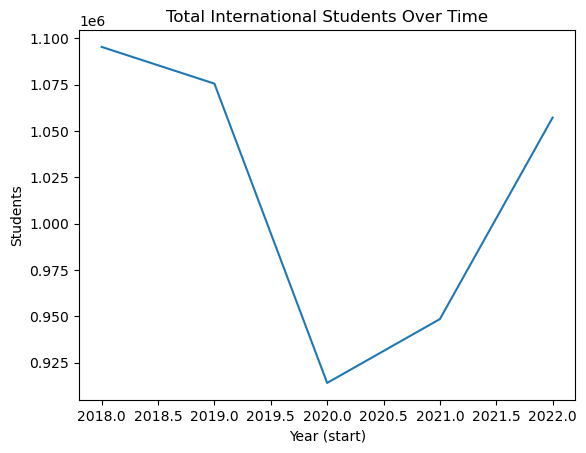

In [20]:
plt.figure()
if 'year' in df1.columns and 'students' in df1.columns:
    # Attempt to convert 'year' like '2022/23' to numeric start year
    year_start = df1['year'].astype(str).str.slice(0,4).astype(int)
    plt.plot(year_start, df1['students'])
    plt.title('Total International Students Over Time')
    plt.xlabel('Year (start)')
    plt.ylabel('Students')
    plt.show()
else:
    print('df1 missing expected columns for plotting.')


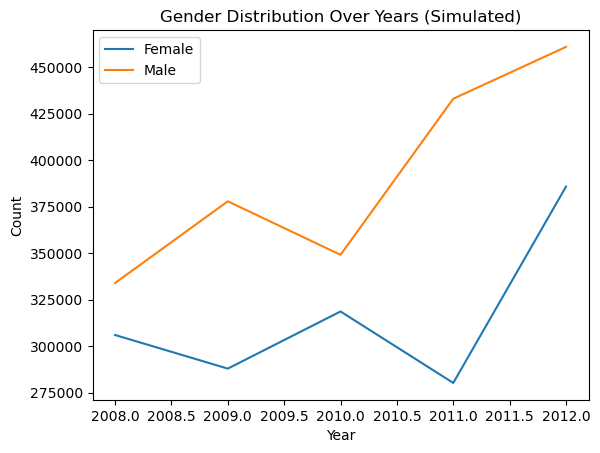

In [21]:
plt.figure()
if 'year' in df6.columns and 'female' in df6.columns and 'male' in df6.columns:
    x = pd.to_numeric(df6['year'], errors='coerce')
    plt.plot(x, df6['female'], label='Female')
    plt.plot(x, df6['male'], label='Male')
    plt.title('Gender Distribution Over Years (Simulated)')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
else:
    print('df6 missing expected columns for plotting.')


## 9. Result & Conclusion
- All six datasets were **cleaned** (missing values handled, duplicates removed) and **validated**.
- A combined Excel workbook `output_file.xlsx` with six sheets was generated for downstream BI use.
- This reconstruction mirrors the original workflow and is suitable for **portfolio demonstration**.

**Next steps:** Connect the cleaned workbook to Power BI, add slicers for year/academic type/field of study, and design visuals for visa type, gender, marital status, employment, and funding sources.